In [1]:
import pandas as pd

https://raw.githubusercontent.com/datasets/covid-19

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

In [3]:
nontrivial_df_russia=df[df.Date>='2020-04-01'][df.Country=='Russia'][df.Confirmed != 0]

/Users/anatoly/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [4]:
nontrivial_df_russia

,Date,Country,Confirmed,Recovered,Deaths
13088,2020-04-01,Russia,2777,190,24
13273,2020-04-02,Russia,3548,235,30
13458,2020-04-03,Russia,4149,281,34
13643,2020-04-04,Russia,4731,333,43
13828,2020-04-05,Russia,5389,355,45
14013,2020-04-06,Russia,6343,406,47
14198,2020-04-07,Russia,7497,494,58
14383,2020-04-08,Russia,8672,580,63
14568,2020-04-09,Russia,10131,698,76
14753,2020-04-10,Russia,11917,795,94


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

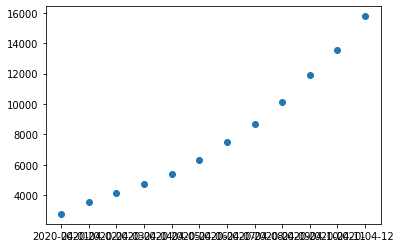

In [6]:
plt.scatter(nontrivial_df_russia['Date'], nontrivial_df_russia['Confirmed'])

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [8]:
XTrain=(pd.to_datetime(nontrivial_df_russia['Date'])-pd.to_datetime(nontrivial_df_russia.iloc[0].Date)).values.reshape(-1,1)

In [9]:
YTrain=nontrivial_df_russia['Confirmed'].values

In [10]:
XTrain=XTrain/np.timedelta64(1, 'D')

In [11]:
YTrain=np.log(YTrain)

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(XTrain, YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [15]:
lr.score(XTrain, YTrain)

0.9980441579140732

In [16]:
XPredict=np.exp(lr.predict(XTrain))

In [17]:
lr.coef_

array([0.15375551])

In [18]:
lr.intercept_

7.989736773121908

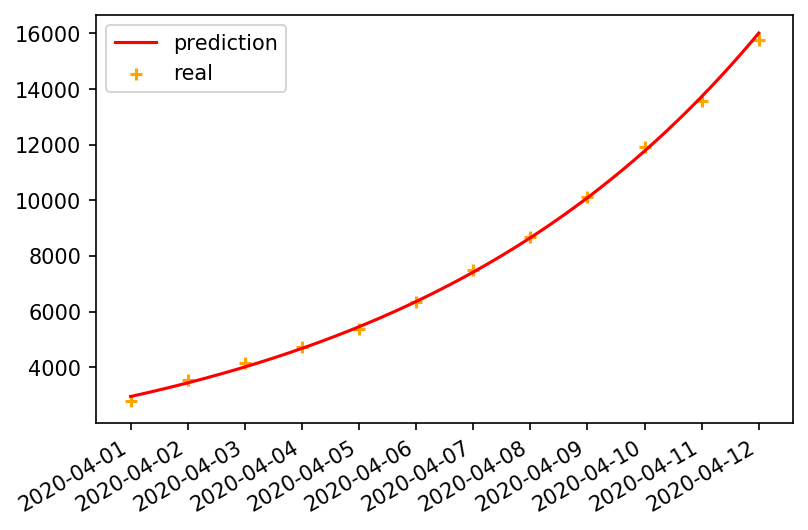

In [19]:
fig=plt.figure(dpi=150)
ax1=fig.add_subplot(111)
#ax1.scatter(nontrivial_df_russia.Date, XPredict, label='prediction', marker='x')
x=np.linspace(XTrain[0],XTrain[-1],1000)
ax1.plot(x, np.exp(x*lr.coef_[0]+lr.intercept_), label='prediction', color='red')
ax1.scatter(nontrivial_df_russia.Date, np.exp(YTrain), label='real', marker='+',color='orange')
fig.autofmt_xdate()
plt.legend(loc='upper left')
plt.show()

In [20]:
def dateToDay(date):
    return (pd.to_datetime(date)-pd.to_datetime(nontrivial_df_russia.iloc[0].Date))/np.timedelta64(1, 'D')

In [21]:
day=dateToDay('2020-05-01')
day

30.0

In [22]:
np.exp(lr.predict([[day]]))[0]

297271.7364566802